# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

To model the demand for shared bikes with the available independent variables. 

the company BoomBikes wants —


- to understand how exactly the demands vary with different features.

- accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

- understand the demand dynamics of a new market. 


## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

## Read Data

In [2]:
df_rental = pd.read_csv('day.csv')

Data has 730 records and 16 variables

In [3]:
df_rental.shape

(730, 16)

In [4]:
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df_rental.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [7]:
df_rental['dteday'].nunique()

730

In [8]:
df_rental['instant'].nunique()

730

Dropping few `instant` and `dteday` as this has unique value 
Dropping `casual` and `registered` columns cause this is segregated value of cnt (dependent variable) 

In [9]:
df_rental.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True, axis=1)

In [10]:
df_rental.shape

(730, 12)

## Visualizing Data

#### Visualizing numeric data

We will use `seaborn` and `matplotlib` to visualise the data

This is one of the important steps:
   - we will get to know the relation between two variables, if correlated can be dropped in this process itself
   - we will analyse if there is any outliers in our data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


Define numerical and categorical variable for visualization

In [12]:
num_variable = ['temp','atemp','hum','windspeed', 'cnt']
cat_variable = ['dteday', 'season','yr','mnth','holiday','weekday','workingday','weathersit']

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 500x2000 with 0 Axes>

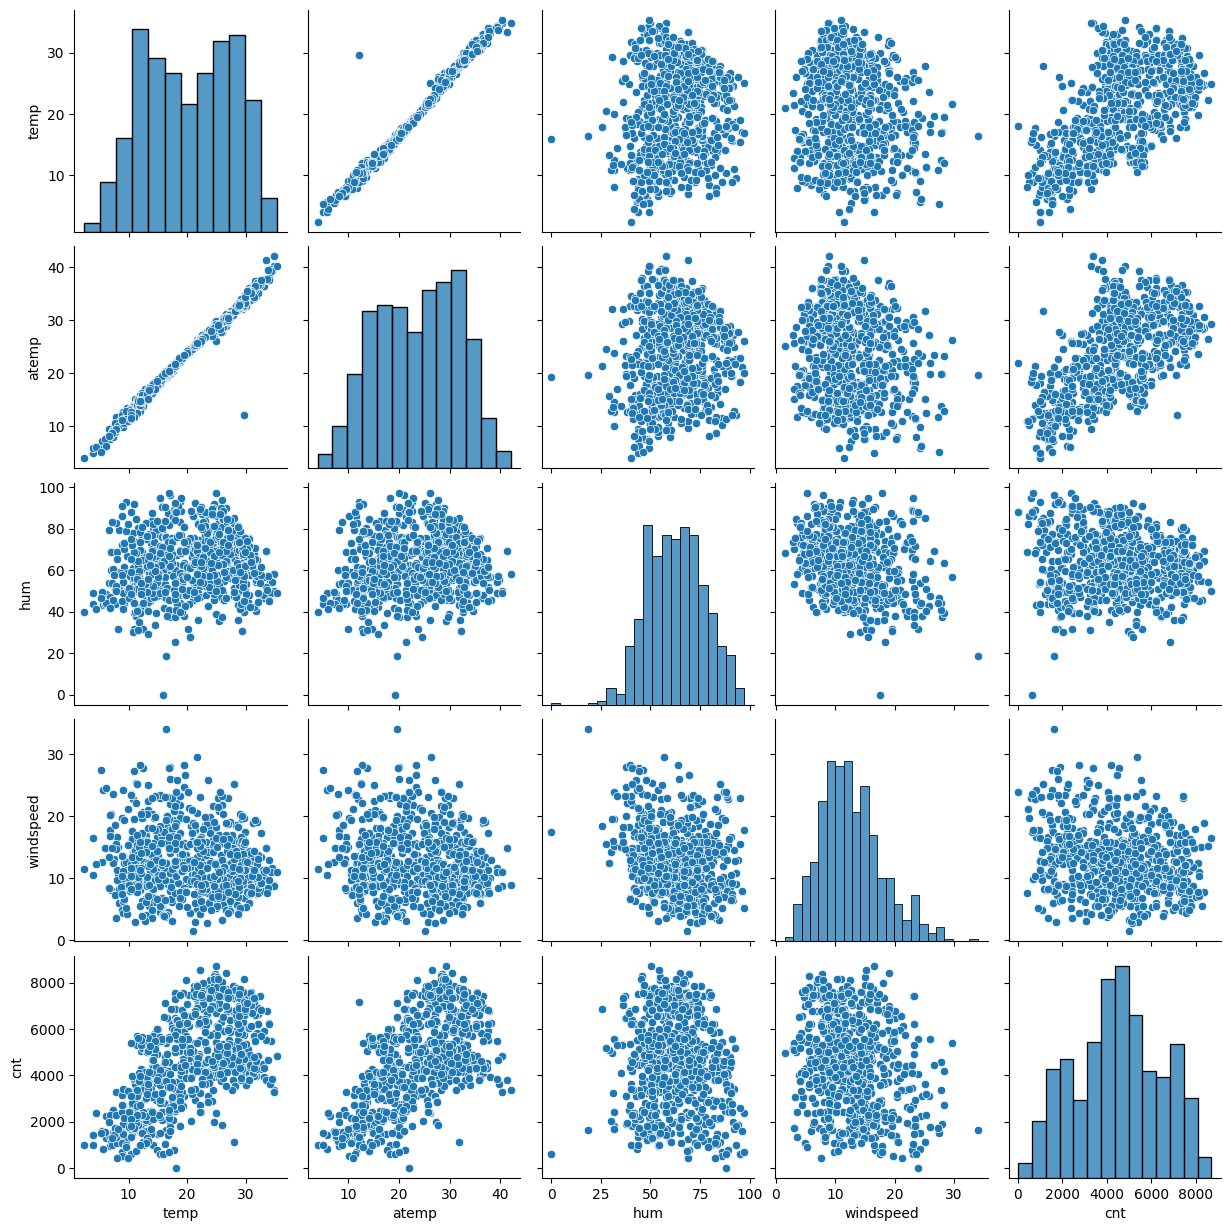

In [13]:
plt.figure(figsize=(5,20))
sns.pairplot(df_rental[num_variable])
plt.show()


##### Few analysis based on the above shown plots
    - atemp and temp is strongly correlated with each other
    - atemp and temp is strongly correlated with cnt
    - there is outlier within atemp 

#### Visualising Categorical Variables

Let's make a boxplot of all the categorical variables

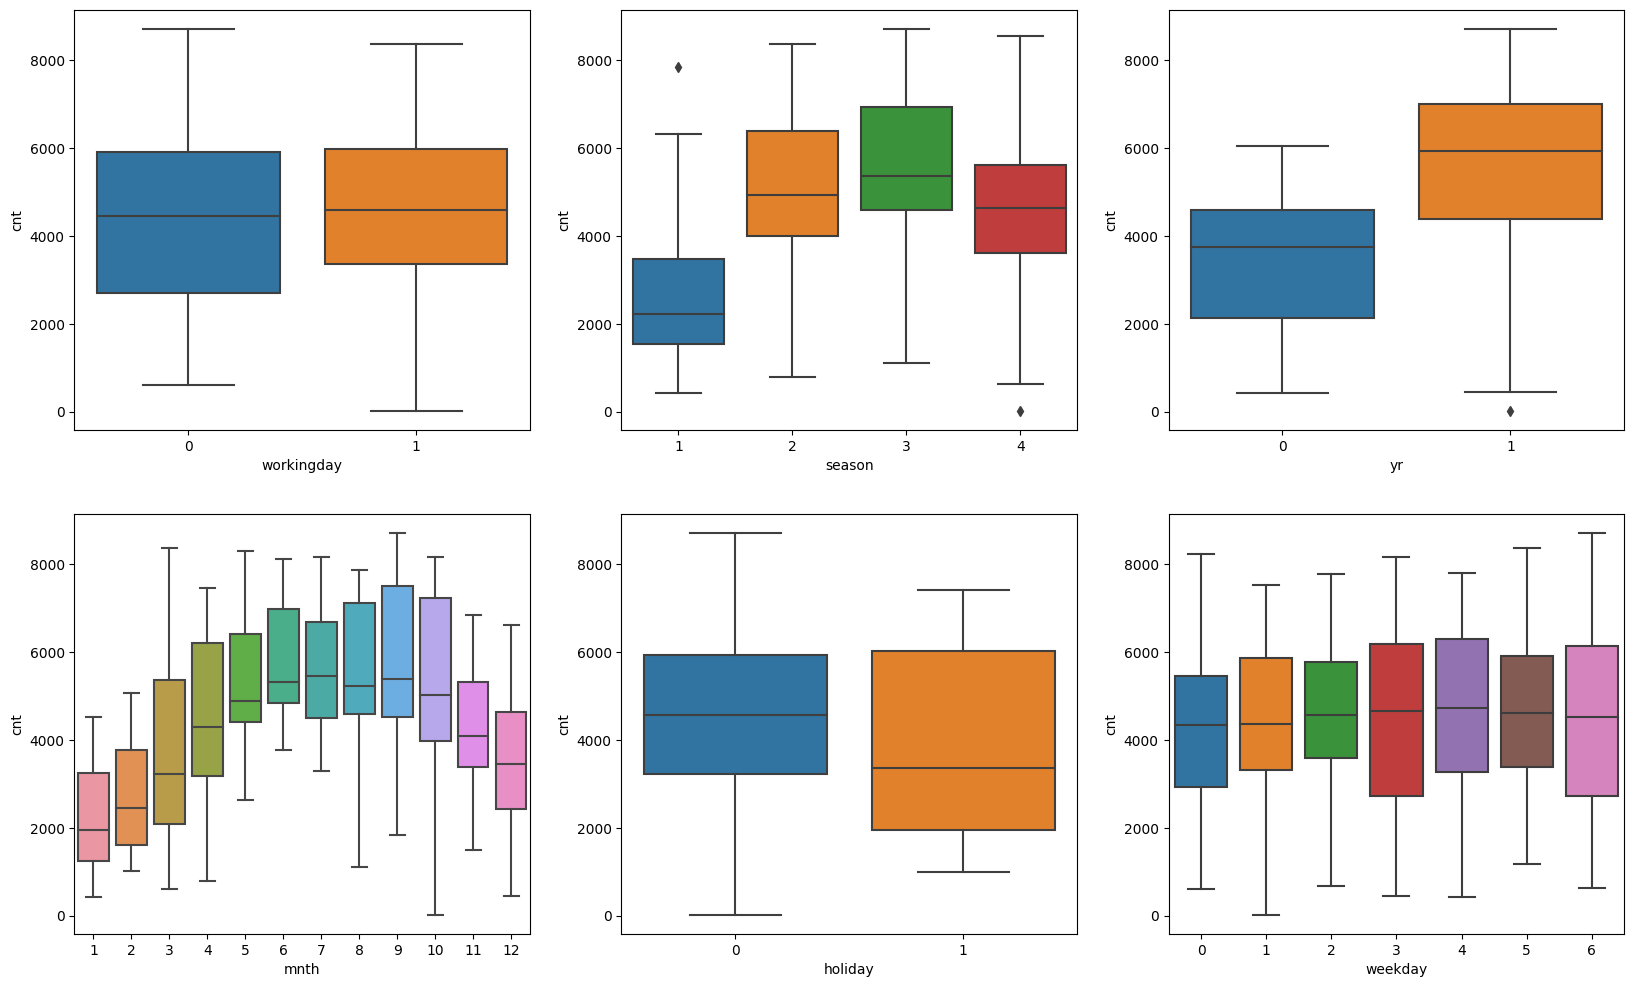

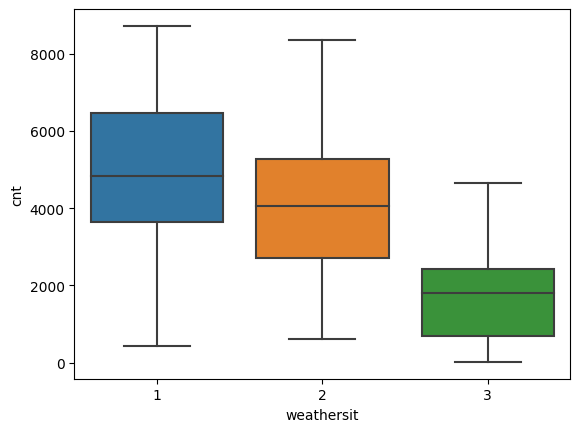

In [14]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = cat_variable[6], y = 'cnt', data = df_rental)
plt.subplot(2,3,2)
sns.boxplot(x = cat_variable[1], y = 'cnt', data = df_rental)
plt.subplot(2,3,3)
sns.boxplot(x = cat_variable[2], y = 'cnt', data = df_rental)
plt.subplot(2,3,4)
sns.boxplot(x = cat_variable[3], y = 'cnt', data = df_rental)
plt.subplot(2,3,5)
sns.boxplot(x = cat_variable[4], y = 'cnt', data = df_rental)
plt.subplot(2,3,6)
sns.boxplot(x = cat_variable[5], y = 'cnt', data = df_rental)
plt.show()
sns.boxplot(x = cat_variable[7], y = 'cnt', data = df_rental)
plt.show()

##### Few analysis based on the above shown plots
    - summer, fall has more booking than spring and winter; spring has least among all
    - 2019 has more booking than 2018
    - rainy season has no booking at all
    - holidays record less bookings
    - April till September has huge booking volume

## Data Preparation

- Dataset has columns `season`, `mnth`, `weekday` and `weathersit` with numerical values.

- But these variable should be considered as categorical, hence we will create dummy for these.

In [15]:
season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

In [16]:
weather={1: 'Clear',
         2: 'Mist',
         3: 'Light Snow',
         4: 'Heavy Rain'}

In [17]:
mnth = {1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}
weekday = {0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}


In [18]:
df_rental['season']=df_rental['season'].map(season)

In [19]:
df_rental['weathersit']=df_rental['weathersit'].map(weather)

In [20]:
df_rental['mnth']=df_rental['mnth'].map(mnth)

In [21]:
df_rental['weekday']=df_rental['weekday'].map(weekday)

### Dummy Variable

We need to convert these categorical columns into numerical,
we will use `dummy variables` here.

In [22]:
dummyvar_rental_df = pd.get_dummies(df_rental, drop_first = True)

In [23]:
dummyvar_rental_df.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1


## Split Data into Test and Train

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dummyvar_rental_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

To get correct estimate of each faetures coefficient we will rescale all numerical feature.
- we will use MinMax scaling.

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
dummyvar_rental_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

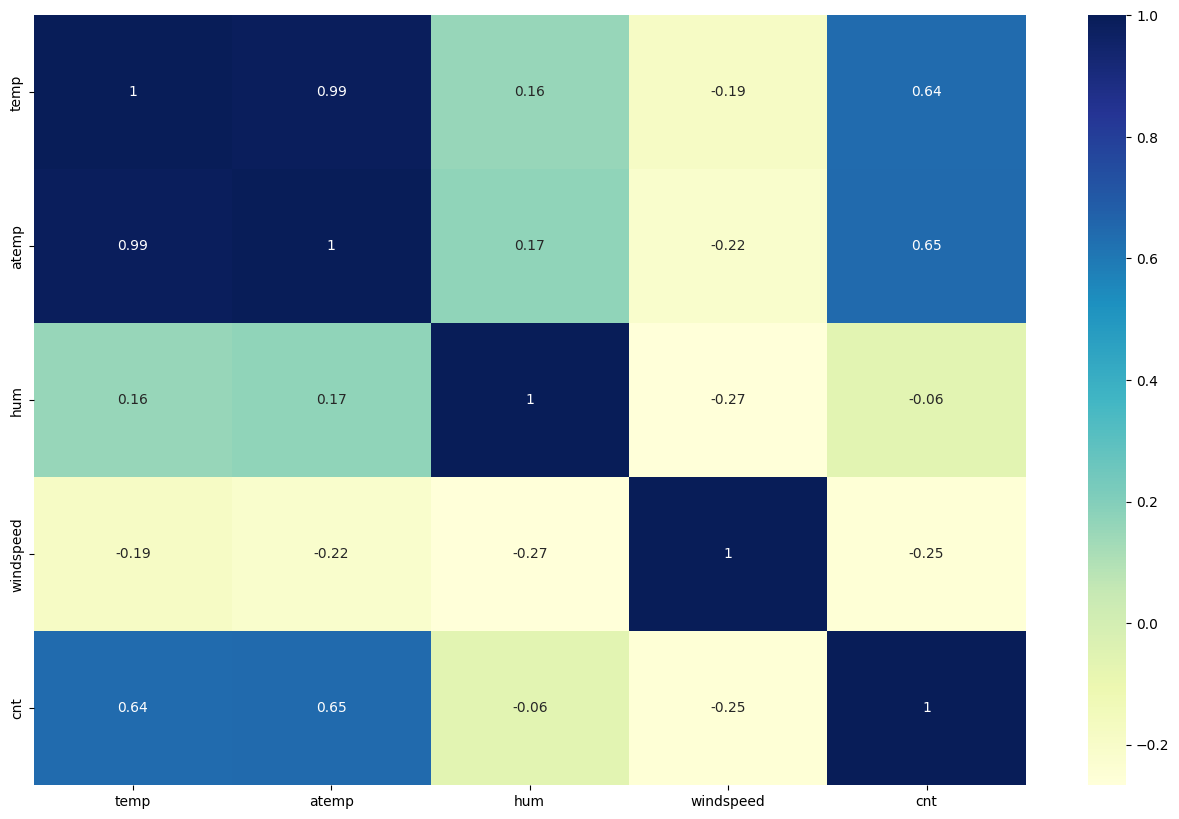

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train[num_variable].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [29]:
del df_train['temp']

Drop temp as this feature is highly correlated with atemp

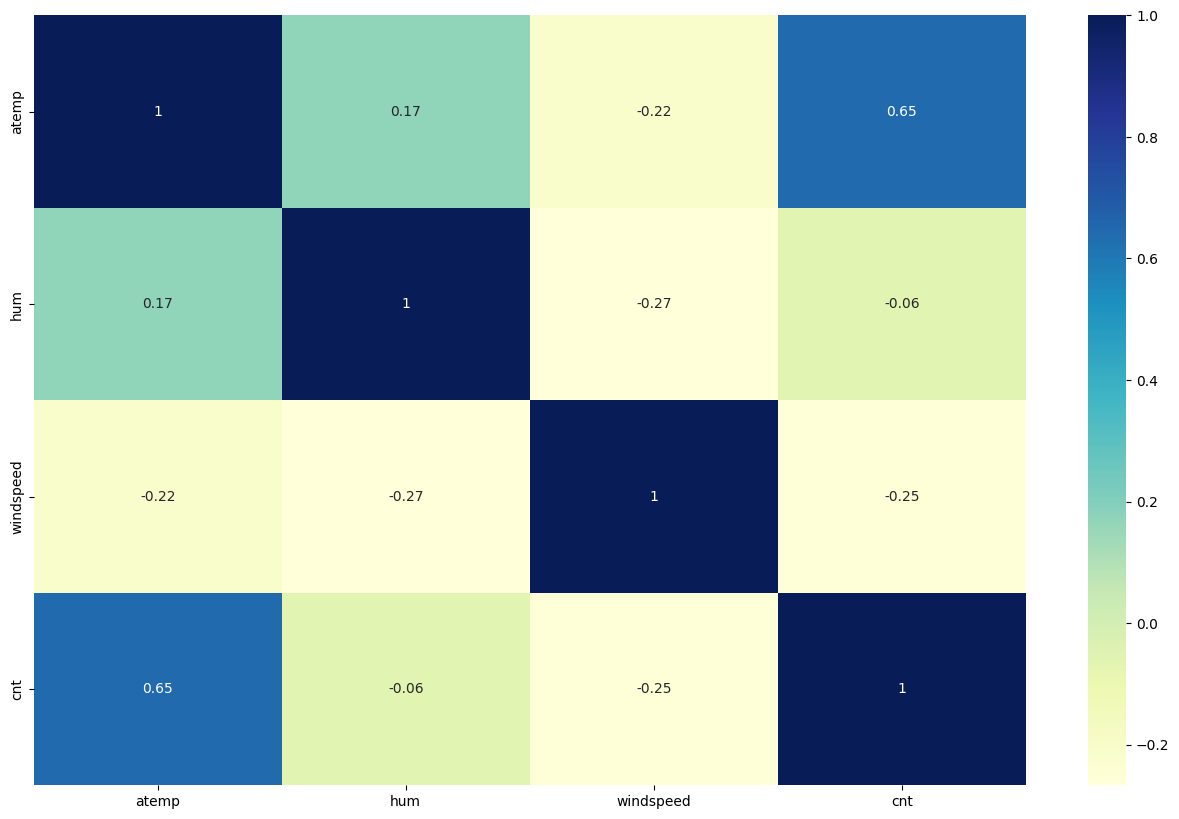

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated
num_variable = ['atemp','hum','windspeed', 'cnt']

df_train[num_variable] = scaler.fit_transform(df_train[num_variable])

plt.figure(figsize = (16, 10))
sns.heatmap(df_train[num_variable].corr(), annot = True, cmap="YlGnBu")
plt.show()

atemp is correlated with cnt (dependent variable), let's analyse more to understand the relation

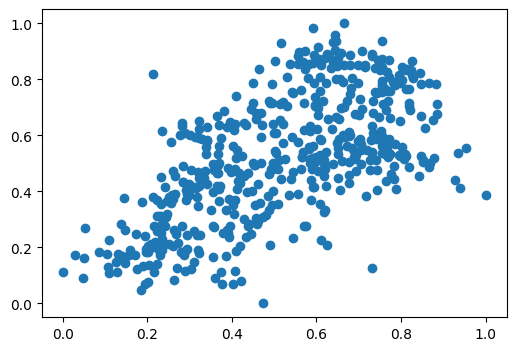

In [31]:
plt.figure(figsize=[6,4])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

## Define train_X and train_y

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


# Train the Linear Regression with only 1 feature

In [34]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [35]:
lr_1.params

const    0.162924
atemp    0.683633
dtype: float64

In [36]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.10e-61
Time:                        16:59:22   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

# Train the Linear Regression with random 2 features

In [37]:
X_train_lm = X_train[['atemp','windspeed']]

In [38]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const        0.227954
atemp        0.656271
windspeed   -0.158976
dtype: float64

In [39]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     192.6
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           6.08e-63
Time:                        16:59:22   Log-Likelihood:                 182.61
No. Observations:                 510   AIC:                            -359.2
Df Residuals:                     507   BIC:                            -346.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2280      0.027      8.435      0.0

# Train the Linear Regression with random 3 features

In [40]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp','windspeed', 'yr']]


In [41]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const        0.143093
atemp        0.594853
windspeed   -0.174733
yr           0.239095
dtype: float64

In [42]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     417.6
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          1.96e-136
Time:                        16:59:22   Log-Likelihood:                 356.20
No. Observations:                 510   AIC:                            -704.4
Df Residuals:                     506   BIC:                            -687.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1431      0.020      7.292      0.0

By increasing the number of variables, variability of the model is increasing. Adding all variable.

# Adding All varibles

In [43]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const                    0.261656
yr                       0.234176
holiday                  0.021320
workingday               0.101138
atemp                    0.419497
hum                     -0.145605
windspeed               -0.168583
season_spring           -0.055055
season_summer            0.030819
season_winter            0.099787
mnth_aug                 0.036894
mnth_dec                -0.054028
mnth_feb                -0.040490
mnth_jan                -0.073420
mnth_jul                -0.020120
mnth_jun                 0.017822
mnth_mar                -0.000636
mnth_may                 0.035849
mnth_nov                -0.047654
mnth_oct                 0.007796
mnth_sept                0.091471
weekday_mon             -0.026325
weekday_sat              0.096947
weekday_sun              0.042251
weekday_thu             -0.013201
weekday_tue             -0.022156
weekday_wed             -0.008112
weathersit_Light Snow   -0.254551
weathersit_Mist         -0.062605
dtype: float64

In [44]:
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.10e-61
Time:                        16:59:22   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

p value for holiday, months and weekday shows value > 0.05, we can drop these variables but lets check with RFE based method
- 85% of variability is explained by combing all features

# RFE Based Modelling 

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [47]:
print(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
print("\nSelected Features:")
col = X_train.columns[rfe.support_]
print(col)  

[('yr', True, 1), ('holiday', True, 1), ('workingday', True, 1), ('atemp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('season_spring', True, 1), ('season_summer', True, 1), ('season_winter', True, 1), ('mnth_aug', True, 1), ('mnth_dec', True, 1), ('mnth_feb', True, 1), ('mnth_jan', True, 1), ('mnth_jul', True, 1), ('mnth_jun', True, 1), ('mnth_mar', True, 1), ('mnth_may', True, 1), ('mnth_nov', True, 1), ('mnth_oct', True, 1), ('mnth_sept', True, 1), ('weekday_mon', True, 1), ('weekday_sat', True, 1), ('weekday_sun', True, 1), ('weekday_thu', True, 1), ('weekday_tue', True, 1), ('weekday_wed', True, 1), ('weathersit_Light Snow', True, 1), ('weathersit_Mist', True, 1)]

Selected Features:
Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
      

In [48]:
X_train_rfe = X_train[col]

Retrain stats model with these features

In [49]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_rfe = sm.OLS(y_train, X_train_rfe).fit()

lr_rfe.params

yr                       0.234176
holiday                  0.282976
workingday               0.362793
atemp                    0.419497
hum                     -0.145605
windspeed               -0.168583
season_spring           -0.055055
season_summer            0.030819
season_winter            0.099787
mnth_aug                 0.036894
mnth_dec                -0.054028
mnth_feb                -0.040490
mnth_jan                -0.073420
mnth_jul                -0.020120
mnth_jun                 0.017822
mnth_mar                -0.000636
mnth_may                 0.035849
mnth_nov                -0.047654
mnth_oct                 0.007796
mnth_sept                0.091471
weekday_mon             -0.026325
weekday_sat              0.358602
weekday_sun              0.303907
weekday_thu             -0.013201
weekday_tue             -0.022156
weekday_wed             -0.008112
weathersit_Light Snow   -0.254551
weathersit_Mist         -0.062605
dtype: float64

In [50]:
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          4.12e-180
Time:                        16:59:22   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
yr                        0.23

## Applying VIF - Manual Feature Selection

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,workingday,83.25
21,weekday_sat,19.34
22,weekday_sun,18.01
6,season_spring,10.74
8,season_winter,9.47
7,season_summer,8.23
17,mnth_nov,6.77
18,mnth_oct,6.59
9,mnth_aug,6.24
3,atemp,5.95


## Manual Feature Elimination
## Model 1

In [53]:
X = X_train_rfe.drop('workingday', 1,)

In [54]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()


In [55]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          4.12e-180
Time:                        16:59:23   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [56]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,37.67
2,atemp,32.72
5,season_spring,11.82
7,season_winter,11.78
6,season_summer,6.91
17,mnth_oct,6.38
16,mnth_nov,6.12
8,mnth_aug,5.41
11,mnth_jan,5.21
4,windspeed,4.95


## Model 2

In [57]:
X = X.drop('hum', 1,)

In [58]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

In [59]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.5
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          3.98e-178
Time:                        16:59:23   Log-Likelihood:                 516.48
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     483   BIC:                            -864.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [60]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,24.44
6,season_winter,11.58
4,season_spring,11.33
16,mnth_oct,5.91
5,season_summer,5.87
15,mnth_nov,5.56
7,mnth_aug,5.09
3,windspeed,4.85
11,mnth_jul,4.78
10,mnth_jan,4.61


## Model 3

In [61]:
## not dropping atemp, it seems to be imp feature
X = X.drop('season_winter', 1,)

In [62]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()


In [63]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          1.08e-176
Time:                        16:59:23   Log-Likelihood:                 510.47
No. Observations:                 510   AIC:                            -968.9
Df Residuals:                     484   BIC:                            -858.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [64]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,23.97
4,season_spring,7.91
5,season_summer,5.40
6,mnth_aug,4.92
3,windspeed,4.84
10,mnth_jul,4.63
9,mnth_jan,3.75
16,mnth_sept,3.68
8,mnth_feb,3.08
15,mnth_oct,3.00


## Model 4

In [65]:
X = X.drop('season_spring', 1,)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()


In [66]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     102.4
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          1.09e-172
Time:                        16:59:23   Log-Likelihood:                 498.19
No. Observations:                 510   AIC:                            -946.4
Df Residuals:                     485   BIC:                            -840.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

In [67]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,23.13
5,mnth_aug,4.58
3,windspeed,4.54
9,mnth_jul,4.33
4,season_summer,4.21
15,mnth_sept,3.44
14,mnth_oct,2.79
10,mnth_jun,2.67
12,mnth_may,2.30
13,mnth_nov,2.28


## Model 5

In [68]:
X = X.drop('mnth_aug', 1,)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()


In [69]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     106.1
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          6.54e-173
Time:                        16:59:23   Log-Likelihood:                 496.25
No. Observations:                 510   AIC:                            -944.5
Df Residuals:                     486   BIC:                            -842.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [70]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,9.10
3,windspeed,4.53
4,season_summer,2.82
15,weekday_mon,2.20
20,weekday_wed,2.20
16,weekday_sat,2.13
0,yr,2.09
17,weekday_sun,2.04
18,weekday_thu,2.02
19,weekday_tue,1.98


## Model 6

In [71]:
X = X.drop('weekday_sat', 1,)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()


In [72]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     111.1
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          6.27e-174
Time:                        16:59:23   Log-Likelihood:                 496.23
No. Observations:                 510   AIC:                            -946.5
Df Residuals:                     487   BIC:                            -849.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [73]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,7.71
3,windspeed,4.46
4,season_summer,2.76
0,yr,2.09
11,mnth_may,1.87
8,mnth_jul,1.76
15,weekday_mon,1.63
21,weathersit_Mist,1.60
9,mnth_jun,1.60
19,weekday_wed,1.58


## Model 7

In [74]:
X = X.drop('mnth_jun', 1,)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()


In [75]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          5.73e-175
Time:                        16:59:23   Log-Likelihood:                 496.23
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     488   BIC:                            -855.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [76]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.43
3,windspeed,4.44
4,season_summer,2.62
0,yr,2.08
14,weekday_mon,1.63
10,mnth_may,1.62
8,mnth_jul,1.60
20,weathersit_Mist,1.59
18,weekday_wed,1.58
15,weekday_sun,1.50


## Model 8

In [77]:
X = X.drop('mnth_may', 1,)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()


In [78]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     122.7
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          5.43e-176
Time:                        16:59:24   Log-Likelihood:                 496.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     489   BIC:                            -861.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [79]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.35
3,windspeed,4.41
4,season_summer,2.12
0,yr,2.08
13,weekday_mon,1.63
8,mnth_jul,1.60
17,weekday_wed,1.58
19,weathersit_Mist,1.58
14,weekday_sun,1.50
15,weekday_thu,1.49


## Model 9

In [80]:
X = X.drop(columns=['mnth_dec','mnth_nov', 'weekday_thu', 'weekday_tue', 'weekday_wed', 'weekday_mon' , 'mnth_jul'], axis=1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()


In [81]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          5.98e-180
Time:                        16:59:24   Log-Likelihood:                 487.20
No. Observations:                 510   AIC:                            -946.4
Df Residuals:                     496   BIC:                            -887.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [82]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.99
3,windspeed,3.84
0,yr,2.03
4,season_summer,1.59
12,weathersit_Mist,1.51
6,mnth_jan,1.24
9,mnth_sept,1.24
5,mnth_feb,1.22
8,mnth_oct,1.22
7,mnth_mar,1.20


In [83]:
cols = X_train_lm.columns

######  Model 9 is the final model with 82% of variability explained with all significant variables which has VIF less than 5

In [84]:
y_train_pred = lr.predict(X_train_lm)

## Validating Linear Regression Assumption
- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals (absence of auto-correlation)
- Normality of Errors

Text(0, 0.5, 'predicted')

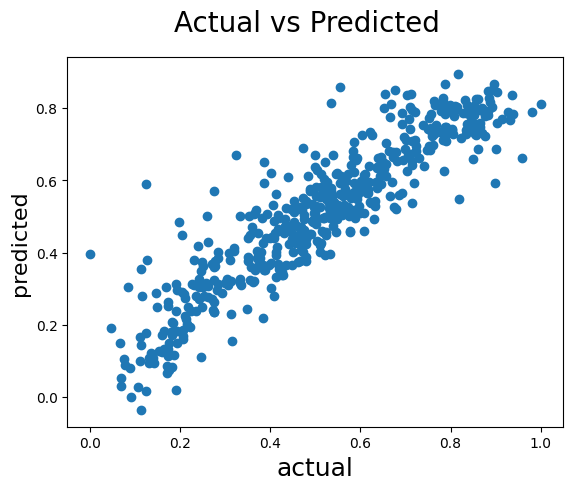

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('Actual vs Predicted', fontsize = 20)              # Plot heading 
plt.xlabel('actual', fontsize = 18)                          # X-label
plt.ylabel('predicted', fontsize = 16)  

### Homoscedasticity
Assumption 2 - The residuals have constant variance with respect to the dependent variable

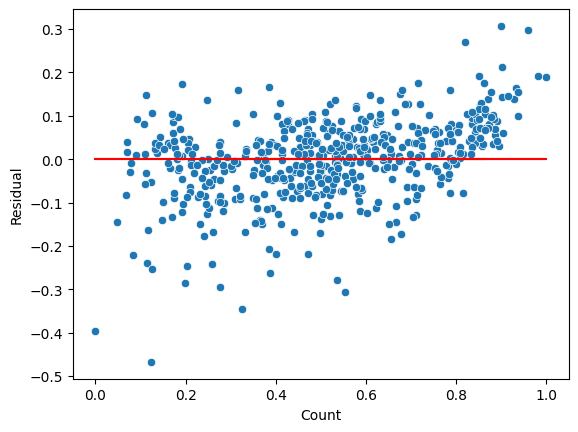

In [86]:
# Validating Homoscedasticity

sns.scatterplot(x = y_train,y = (y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Absence  of multicollinearity

Assumption 3 - all the independent variable in model has VIF score less than 5. As we know that high VIF score indicates multicollinearity we can say that predictor variable does not have multicollinearity.

In [87]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[vif['VIF']>5]

,Features,VIF


### Autocorrelation in Residual

Assumption 4 - Autocorrelation refers to the fact that observations’ errors are correlated.
To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 

(0–2: positive auto-correlation, 2–4: negative auto-correlation) 

In [88]:

print('The Durbin-Watson value for Model is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Model is 2.1054


There is no auto-correlation

### Normality if Residual Analysis - Checking Error distribution

Assumption 5 - To check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

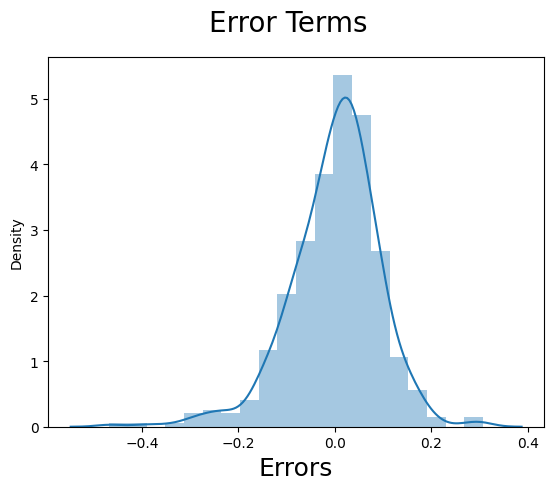

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

## Making Predictions

In [91]:
df_test[num_variable] = scaler.transform(df_test[num_variable])

In [92]:
y_test = df_test.pop('cnt')

In [93]:
X_test = df_test

In [94]:
## need to add constant to make prediction
X_test = sm.add_constant(X_test)

In [95]:
## droping few variables which were insignificant and dropped while iterating over vif and modelling
X_test = X_test[cols]

In [96]:
## make prediction
y_pred = lr.predict(X_test)

## Model Evaluation

Text(0, 0.5, 'y_pred')

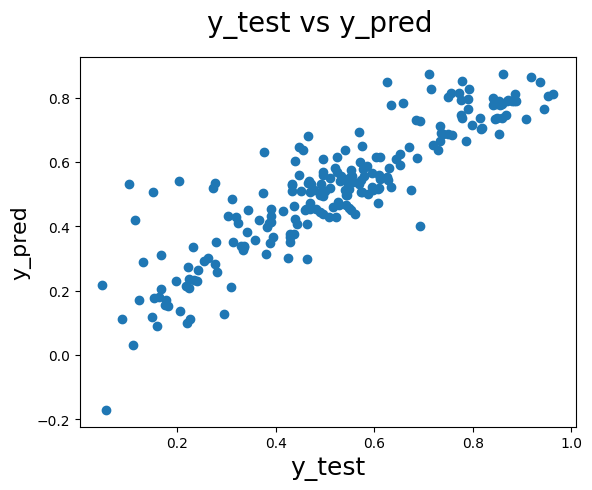

In [97]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### R2 in test data

In [98]:
from sklearn.metrics import r2_score

In [99]:
r2_score(y_test, y_pred)

0.7874316965426023

##### Train R2 is 0.82 and Test R2 is 0.79 , 3% difference in R2 is good to consider

## Model Summary 

In [100]:
print('R-Squared score on Train set: ', round(lr.rsquared,2))
print('Adjusted R-Squared score on Train set: ', round(lr.rsquared_adj,2))
print('R-Squared score on Test set',round(r2_score(y_test, y_pred),2))

R-Squared score on Train set:  0.83
Adjusted R-Squared score on Train set:  0.82
R-Squared score on Test set 0.79


## Conclusions

We can include few things to make our model better than current: 
1. Try building non-linear model
2. Add new features as geolocation, pincode, city etc

Model Insights:
1. Positive relation with year. It shows bike rental has increased over the year.
2. Strong positive relation with feeling temperature.
3. Negative relation with windspeed & spring season.
4. 0 rentals in rainy season

Business Insights:
- Business should make more bike available during april to Sept excluding rainy seasons.